In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 20

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2022-05-31 12:29:52.899191: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
Total params: 1,290
Trainable params: 1,290
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
44/62 [====================>.........] - ETA: 0s - loss: 2.9795 - accuracy: 0.0824 
Epoch 00001: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 1s 4ms/step - loss: 2.9545 - accuracy: 0.0962 - val_loss: 2.8356 - val_accuracy: 0.1389
Epoch 2/1000
26/62 [===========>..................] - ETA: 0s - loss: 2.8270 - accuracy: 0.1553
Epoch 00002: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 2.7803 - accuracy: 0.1616 - val_loss: 2.6491 - val_accuracy: 0.1738
Epoch 3/1000
35/62 [===============>..............] - ETA: 0s - loss: 2.6455 - accuracy: 0.1766
Epoch 00003: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 2.6387 - accuracy: 0.1747 - val_loss: 2.5242 - val_accuracy: 0.1857
Epoch 4/1000
37/62 [================>.............] - ETA: 0s - loss: 2.5530 - accur

Epoch 28/1000
42/62 [===================>..........] - ETA: 0s - loss: 1.6108 - accuracy: 0.4496
Epoch 00028: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.6109 - accuracy: 0.4501 - val_loss: 1.1466 - val_accuracy: 0.6824
Epoch 29/1000
52/62 [========================>.....] - ETA: 0s - loss: 1.5871 - accuracy: 0.4584
Epoch 00029: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.5905 - accuracy: 0.4568 - val_loss: 1.1296 - val_accuracy: 0.6824
Epoch 30/1000
48/62 [======================>.......] - ETA: 0s - loss: 1.5695 - accuracy: 0.4593
Epoch 00030: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.5728 - accuracy: 0.4600 - val_loss: 1.1277 - val_accuracy: 0.6740
Epoch 31/1000
45/62 [====================>.........] - ETA: 0s - loss: 1.5760 - ac

Epoch 55/1000
46/62 [=====================>........] - ETA: 0s - loss: 1.4415 - accuracy: 0.5010
Epoch 00055: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.4507 - accuracy: 0.4999 - val_loss: 0.9396 - val_accuracy: 0.7154
Epoch 56/1000
56/62 [==========================>...] - ETA: 0s - loss: 1.4180 - accuracy: 0.5180
Epoch 00056: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.4201 - accuracy: 0.5152 - val_loss: 0.9342 - val_accuracy: 0.7150
Epoch 57/1000
57/62 [==========================>...] - ETA: 0s - loss: 1.4452 - accuracy: 0.5026
Epoch 00057: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.4462 - accuracy: 0.5024 - val_loss: 0.9374 - val_accuracy: 0.7280
Epoch 58/1000
56/62 [==========================>...] - ETA: 0s - loss: 1.4331 - ac

Epoch 82/1000
58/62 [===========================>..] - ETA: 0s - loss: 1.3624 - accuracy: 0.5345
Epoch 00082: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3697 - accuracy: 0.5324 - val_loss: 0.8664 - val_accuracy: 0.7357
Epoch 83/1000
59/62 [===========================>..] - ETA: 0s - loss: 1.3678 - accuracy: 0.5338
Epoch 00083: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3643 - accuracy: 0.5344 - val_loss: 0.8570 - val_accuracy: 0.7484
Epoch 84/1000
59/62 [===========================>..] - ETA: 0s - loss: 1.3679 - accuracy: 0.5340
Epoch 00084: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3700 - accuracy: 0.5336 - val_loss: 0.8752 - val_accuracy: 0.7242
Epoch 85/1000
58/62 [===========================>..] - ETA: 0s - loss: 1.3636 - ac

Epoch 109/1000
57/62 [==========================>...] - ETA: 0s - loss: 1.3485 - accuracy: 0.5430
Epoch 00109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3487 - accuracy: 0.5414 - val_loss: 0.8382 - val_accuracy: 0.7568
Epoch 110/1000
59/62 [===========================>..] - ETA: 0s - loss: 1.3422 - accuracy: 0.5487
Epoch 00110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3424 - accuracy: 0.5477 - val_loss: 0.8262 - val_accuracy: 0.7568
Epoch 111/1000
60/62 [============================>.] - ETA: 0s - loss: 1.3249 - accuracy: 0.5486
Epoch 00111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3253 - accuracy: 0.5487 - val_loss: 0.8359 - val_accuracy: 0.7357
Epoch 112/1000
61/62 [============================>.] - ETA: 0s - loss: 1.3291 

Epoch 136/1000
53/62 [========================>.....] - ETA: 0s - loss: 1.3123 - accuracy: 0.5470
Epoch 00136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3148 - accuracy: 0.5466 - val_loss: 0.8327 - val_accuracy: 0.7526
Epoch 137/1000
48/62 [======================>.......] - ETA: 0s - loss: 1.3291 - accuracy: 0.5617
Epoch 00137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3302 - accuracy: 0.5579 - val_loss: 0.8346 - val_accuracy: 0.7418
Epoch 138/1000
60/62 [============================>.] - ETA: 0s - loss: 1.3428 - accuracy: 0.5512
Epoch 00138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3461 - accuracy: 0.5513 - val_loss: 0.8416 - val_accuracy: 0.7346
Epoch 139/1000
57/62 [==========================>...] - ETA: 0s - loss: 1.3105 

Epoch 163/1000
56/62 [==========================>...] - ETA: 0s - loss: 1.3114 - accuracy: 0.5579
Epoch 00163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3104 - accuracy: 0.5586 - val_loss: 0.8331 - val_accuracy: 0.7457
Epoch 164/1000
57/62 [==========================>...] - ETA: 0s - loss: 1.3150 - accuracy: 0.5535
Epoch 00164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3172 - accuracy: 0.5545 - val_loss: 0.8162 - val_accuracy: 0.7395
Epoch 165/1000
59/62 [===========================>..] - ETA: 0s - loss: 1.3222 - accuracy: 0.5539
Epoch 00165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
62/62 [==============================] - 0s 2ms/step - loss: 1.3196 - accuracy: 0.5546 - val_loss: 0.7950 - val_accuracy: 0.7633
Epoch 166/1000
58/62 [===========================>..] - ETA: 0s - loss: 1.3075 

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 [==============================] - 0s 889us/step - loss: 0.8006 - accuracy: 0.7472


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[6.5386206e-01 1.3755662e-02 1.0186459e-03 3.1250513e-01 1.5026970e-03
 2.3950374e-04 9.8575729e-05 3.6246056e-04 2.0561579e-03 1.1376417e-02
 1.6218129e-11 2.5573346e-12 4.4092296e-13 9.9691591e-05 2.1209345e-04
 1.7670520e-03 1.0547334e-03 3.0873060e-05 1.6116027e-06 5.6641460e-05]
0


# Confusion matrix

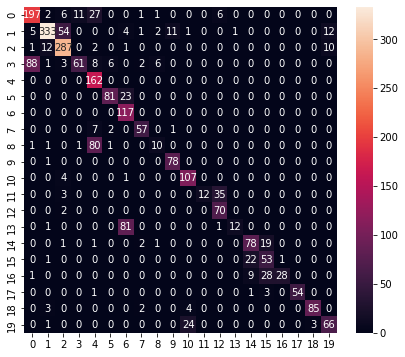

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       251
           1       0.94      0.79      0.85       424
           2       0.80      0.92      0.85       313
           3       0.84      0.35      0.49       175
           4       0.56      1.00      0.72       162
           5       0.90      0.78      0.84       104
           6       0.52      1.00      0.68       117
           7       0.88      0.85      0.86        67
           8       0.50      0.11      0.18        94
           9       0.87      0.99      0.92        79
          10       0.79      0.96      0.86       112
          11       1.00      0.24      0.39        50
          12       0.62      0.97      0.76        72
          13       0.92      0.13      0.22        95
          14       0.71      0.76      0.74       102
          15       0.51      0.69      0.59        77
          16       0.97      0.42      0.59        66
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

2022-05-31 12:30:15.528673: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /var/folders/w_/7n14qq393r55_yfyz28cvxlc0000gn/T/tmpyh_djpok/assets


2022-05-31 12:30:17.533696: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2022-05-31 12:30:17.533720: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2022-05-31 12:30:17.538087: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/w_/7n14qq393r55_yfyz28cvxlc0000gn/T/tmpyh_djpok
2022-05-31 12:30:17.542427: I tensorflow/cc/saved_model/reader.cc:107] Reading meta graph with tags { serve }
2022-05-31 12:30:17.542438: I tensorflow/cc/saved_model/reader.cc:148] Reading SavedModel debug info (if present) from: /var/folders/w_/7n14qq393r55_yfyz28cvxlc0000gn/T/tmpyh_djpok
2022-05-31 12:30:17.550176: I tensorflow/cc/saved_model/loader.cc:210] Restoring SavedModel bundle.
2022-05-31 12:30:17.623209: I tensorflow/cc/saved_model/loader.cc:194] Running initialization op on SavedModel bundle at path: /var/folders/w_/7n14qq393r55_yfyz28cvxlc0000gn/T/tmpyh_djpok
2022-05

7120

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.13 ms, sys: 1.7 ms, total: 2.82 ms
Wall time: 2.7 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.5386200e-01 1.3755671e-02 1.0186468e-03 3.1250510e-01 1.5026961e-03
 2.3950350e-04 9.8575816e-05 3.6246039e-04 2.0561577e-03 1.1376427e-02
 1.6218160e-11 2.5573343e-12 4.4092291e-13 9.9691584e-05 2.1209344e-04
 1.7670528e-03 1.0547333e-03 3.0873056e-05 1.6116039e-06 5.6641456e-05]
0
